#Tentang Dataset
##Analisis distribusi harga rumah untuk memahami tren pasar dan mengidentifikasi peluang investasi potensial.

https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

Kumpulan data ini berisi harga rumah di New York, yang memberikan wawasan berharga mengenai pasar real estate di wilayah tersebut. Ini mencakup informasi seperti nama broker, tipe rumah, harga, jumlah kamar tidur dan kamar mandi, luas properti, alamat, negara bagian, wilayah administratif dan lokal, nama jalan, dan koordinat geografis.


*   BROKERTITLE: Title of the broker
*   TYPE: Type of the house
*   PRICE: Price of the house
*   BEDS: Number of bedrooms
*   BATH: Number of bathrooms
*   PROPERTYSQFT: Square footage of the property
*   ADDRESS: Full address of the house
*   STATE: State of the house
*   MAIN_ADDRESS: Main address information
*   ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
*   LOCALITY: Locality information
*   SUBLOCALITY: Sublocality information
*   STREET_NAME: Street name
*   LONG_NAME: Long name
*   FORMATTED_ADDRESS: Formatted address
*   LATITUDE: Latitude coordinate of the house
*   LONGITUDE: Longitude coordinate of the house

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Load Data

In [5]:
pd.set_option('display.max_column',50)
path = ('/content/drive/MyDrive/Colab Notebooks/Final Project/DS 23B_Dzulqisan Maulana_Progress Final Project (Drive)/NY-House-Dataset.csv')
df = pd.read_csv(path)

#  Preliminary Look and Data Cleansing

## Sample of data

In [7]:
# Showing top 5 rows of the data
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [8]:
# sample 10 rows of the data
# the results change everytime the code is executed (random sample)
df.sample(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
1716,Brokered by CENTURY 21 Kafcos Realty,Multi-family home for sale,1430000,6,4.000000,2840.000000,242 Balcom Ave,"Bronx, NY 10465","242 Balcom AveBronx, NY 10465",United States,New York,Bronx County,The Bronx,Balcom Avenue,"242 Balcom Ave, Bronx, NY 10465, USA",40.815239,-73.821988
182,Brokered by Sotheby's International Realty - E...,Townhouse for sale,1250000,8,2.373861,2184.207862,246 E 58th St # Th,"New York, NY 10022","246 E 58th St # ThNew York, NY 10022",United States,New York,New York County,New York,East 58th Street,"246 E 58th St, New York, NY 10022, USA",40.760025,-73.965355
2861,Brokered by Brown Harris Stevens - 445 Park Av...,Co-op for sale,2500000,5,6.000000,3860.000000,870 United Nations Plaza Plz Units 37 & 38C,"Manhattan, NY 10017",870 United Nations Plaza Plz Units 37 & 38CMan...,United States,New York,New York County,New York,United Nations Plaza,"870 United Nations Plaza, New York, NY 10017, USA",40.752482,-73.965463
2609,Brokered by Jamie & Connie Real Estate Grp,House for sale,988000,4,3.000000,1552.000000,158-34 75th Ave,"Flushing, NY 11366","158-34 75th AveFlushing, NY 11366",United States,New York,Queens County,Queens,75th Avenue,"158-34 75th Ave, Flushing, NY 11366, USA",40.726478,-73.809351
4327,"Brokered by Nest Seekers International, Tribeca",Co-op for sale,2595000,3,4.000000,2184.207862,39 Gramercy Park N Apt 3C,"New York, NY 10010","39 Gramercy Park N Apt 3CNew York, NY 10010",New York,New York County,New York,Manhattan,39,"39 Gramercy Park N #3c, New York, NY 10010, USA",40.737769,-73.984380
4457,Brokered by COMPASS,Townhouse for sale,1495000,6,2.000000,2184.207862,28-16 37th St,"Astoria, NY 11103","28-16 37th StAstoria, NY 11103",United States,New York,Queens County,Queens,37th Street,"28-16 37th St, Long Island City, NY 11103, USA",40.765864,-73.915889
542,Brokered by Keller Williams Rlty Landmark,Condo for sale,758000,3,2.000000,1278.000000,3-27 Endeavor Pl Unit C,"College Point, NY 11356","3-27 Endeavor Pl Unit CCollege Point, NY 11356",United States,New York,Queens County,Queens,Endeavor Place,"327 Endeavor Pl, College Point, NY 11356, USA",40.792882,-73.844921
3088,Brokered by ALTA Real Estate,Condo for sale,1650000,3,2.000000,1493.000000,150 W 51st St Apt 2116,"New York, NY 10019","150 W 51st St Apt 2116New York, NY 10019",New York,New York County,New York,Manhattan,150,"150 W 51st St APT 2116, New York, NY 10019, USA",40.761252,-73.982611
4636,Brokered by Keller Williams Rlty Landmark,House for sale,970000,4,2.000000,2185.000000,116-20 132nd St,"South Ozone Park, NY 11420","116-20 132nd StSouth Ozone Park, NY 11420",United States,New York,Queens County,Queens,132nd Street,"11620 132nd St, Jamaica, NY 11420, USA",40.677626,-73.808058
350,Brokered by New York Realty Minimax,Multi-family home for sale,869888,4,3.000000,2184.207862,86-27 125th St,"Richmond Hill, NY 11418","86-27 125th StRichmond Hill, NY 11418",United States,New York,Queens County,Queens,125th Street,"86-27 125th St, Richmond Hill, NY 11418, USA",40.701901,-73.825678


Observations:
1. Terdapat 6 kolom numerik dan 11 kolom kategorik
2. Terdapat konten di kolom `LOCALITY` yang masuk ke dalam kolom `ADMINISTRATIVE_AREA_LEVEL_2`,`SUBLOCALITY`,`STREET_NAME`

## General Information & Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

Observation:
1. Data contains 17 columns with 4801 rows
2. Most of the columns have values
3. All dtypes seem OK (appropriate), kecuali kolom `BATH` harus di ganti menjadi dtypes integer

In [14]:
#Mengubah tipe data BATH dari float menjadi integer
df['BATH'] = df['BATH'].astype('int')

In [11]:
# number of missing values per column
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

There is no missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   int64  
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

Success changing dtype!

## Duplicated data check

In [17]:
# number of duplicated data
df.duplicated().sum()

214

There are 214 duplicated rows; will be dropped later.

In [19]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('PRICE').head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
3415,Brokered by BESMATCH REAL ESTATE,Co-op for sale,99000,1,1,850.000000,1185 Anderson Ave Apt 2C,"Bronx, NY 10452","1185 Anderson Ave Apt 2CBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1185,"1185 Anderson Ave #2c, Bronx, NY 10452, USA",40.836662,-73.923959
3412,Brokered by BESMATCH REAL ESTATE,Co-op for sale,99000,1,1,850.000000,1185 Anderson Ave Apt 2C,"Bronx, NY 10452","1185 Anderson Ave Apt 2CBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1185,"1185 Anderson Ave #2c, Bronx, NY 10452, USA",40.836662,-73.923959
3625,Brokered by CENTURY 21 Milestone Realty,Co-op for sale,119000,3,1,2184.207862,89-00 170 St Unit 11N,"Jamaica, NY 11432","89-00 170 St Unit 11NJamaica, NY 11432",New York,Queens County,Queens,Jamaica,8900,"8900 170th St Apt 11l, Jamaica, NY 11432, USA",40.709570,-73.791130
3615,Brokered by CENTURY 21 Milestone Realty,Co-op for sale,119000,3,1,2184.207862,89-00 170 St Unit 11N,"Jamaica, NY 11432","89-00 170 St Unit 11NJamaica, NY 11432",New York,Queens County,Queens,Jamaica,8900,"8900 170th St Apt 11l, Jamaica, NY 11432, USA",40.709570,-73.791130
1400,Brokered by Corcoran,Co-op for sale,129000,3,1,2184.207862,87-15 165th St Unit 2A,"Jamaica, NY 11432","87-15 165th St Unit 2AJamaica, NY 11432",New York,Queens County,Queens,Jamaica,87-15,"87-15 165th St #2a, Jamaica, NY 11432, USA",40.710451,-73.798206
1408,Brokered by Corcoran,Co-op for sale,129000,3,1,2184.207862,87-15 165th St Unit 2A,"Jamaica, NY 11432","87-15 165th St Unit 2AJamaica, NY 11432",New York,Queens County,Queens,Jamaica,87-15,"87-15 165th St #2a, Jamaica, NY 11432, USA",40.710451,-73.798206
3743,Brokered by Brown Harris Stevens- 3531 Johnson...,Co-op for sale,165000,1,1,750.000000,5614 Netherland Ave Apt 4B,"Bronx, NY 10471","5614 Netherland Ave Apt 4BBronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5614,"5614 Netherland Ave #4b, Bronx, NY 10471, USA",40.904780,-73.905744
3725,Brokered by Brown Harris Stevens- 3531 Johnson...,Co-op for sale,165000,1,1,750.000000,5614 Netherland Ave Apt 4B,"Bronx, NY 10471","5614 Netherland Ave Apt 4BBronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5614,"5614 Netherland Ave #4b, Bronx, NY 10471, USA",40.904780,-73.905744
1560,Brokered by Flat Rate Realty Of Queens Ltd,Co-op for sale,169000,1,1,850.000000,165-20 Highland Ave Unit 105,"Jamaica, NY 11432","165-20 Highland Ave Unit 105Jamaica, NY 11432",New York,Queens County,Queens,Jamaica,16520,"16520 Highland Ave Apt 105, Jamaica, NY 11432,...",40.710660,-73.798690
1555,Brokered by Flat Rate Realty Of Queens Ltd,Co-op for sale,169000,1,1,850.000000,165-20 Highland Ave Unit 105,"Jamaica, NY 11432","165-20 Highland Ave Unit 105Jamaica, NY 11432",New York,Queens County,Queens,Jamaica,16520,"16520 Highland Ave Apt 105, Jamaica, NY 11432,...",40.710660,-73.798690


### Drop duplicated rows

In [20]:
# drop duplicated rows
df = df.drop_duplicates()

In [22]:
# sanity check
df.duplicated().sum()

0

Good good! Duplicated rows have gone

# Data understanding

## Statistical summary

In [24]:
# group column names based on type
categoricals = ['BROKERTITLE',
                'TYPE',
                'ADDRESS',
                'STATE',
                'MAIN_ADDRESS',
                'ADMINISTRATIVE_AREA_LEVEL_2',
                'LOCALITY',
                'SUBLOCALITY',
                'STREET_NAME',
                'LONG_NAME',
                'FORMATTED_ADDRESS'
]

numericals = ['PRICE',
              'BEDS',
              'BATH',
              'PROPERTYSQFT',
              'LATITUDE',
              'LONGITUDE'
]

In [25]:
# numerical statistical sumary
df[numericals].describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.354262,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.970637,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


Observation:
* Overall, the minimum and maximum values imbalance for each column

In [32]:
#group data yang akan di olah
cols = ['PRICE','BEDS','BATH','PROPERTYSQFT']

In [26]:
# describe method on categorical data
df[categoricals].describe()

,BROKERTITLE,TYPE,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS
count,4587,4587,4587,4587,4587,4587,4587,4587,4587,4587,4587
unique,1036,13,4582,308,4583,29,11,21,174,2731,4550
top,Brokered by COMPASS,Co-op for sale,310-312 Hillside Ave,"Brooklyn, NY 11235","310-312 Hillside AveStaten Island, NY 10304",United States,New York,New York,Manhattan,2,"67-66 108th St, Forest Hills, NY 11375, USA"
freq,435,1388,2,99,2,2374,2395,967,930,19,3


In [34]:
# showing the precise value counts
cats = ['TYPE', 'LOCALITY','ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY','STREET_NAME']
for col in cats:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of TYPE column
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: TYPE, dtype: int64 

Value counts of LOCALITY column
New York           2395
New York County     930
Queens County       536
Kings County        442
Bronx County        172
Richmond County      58
United States        37
Brooklyn              6
Queens                6
The Bronx             4
Flatbush              1
Name: LOCALITY, dtype: int64 

Value counts of ADMINISTRATIVE_AREA_LEVEL_2 column
United States      2374
New York           2138
New York County      21
11214                 8
Queens County   

Observations:
* `LOCALOTY` have 11 unique value.
* Terdapat value `LOCALITY` yang berada di kolom `ADMINISTRATIVE_AREA_LEVEL_2`,`SUBLOCALITY`,`STREET_NAME`
* `TYPE` have 13 unique value.

###Data manipulation

####Manipulasi data dari kolom `LOCALITY`

In [42]:
#menyalin data
df_locality_c = df.copy()

In [43]:
#membuat kolom baru dari LOCALITY menjadi LOCAL
fix_list_sn = ['New York County','Queens County','Kings County','Bronx County','Richmond County','The Bronx'] #data yang harus di pindahkan dari STREET_NAME
fix_list_sl = ['New York County','Queens County','Kings County','Bronx County','Richmond County','Manhattan'] #data yang harus di pindahkan dari SUBLOCALITY
new_locality = [] #data yangsudah di pindahkan
panjang_sn = len(df_locality_c['STREET_NAME']) #panjang data
df_street_name = df_locality_c['STREET_NAME']
df_sublocality = df_locality_c['SUBLOCALITY']
df_locality = df_locality_c['LOCALITY']
for row in range(panjang_sn):
  if str(df_street_name.iloc[row]) in fix_list_sn:
    if str(df_street_name.iloc[row]) == 'The Bronx':
      new_locality.append('Bronx County')
    #new_street_name.append(df_street_name.iloc[row])
    else:
      new_locality.append(df_street_name.iloc[row])
  elif str(df_sublocality.iloc[row]) in fix_list_sl:
    if str(df_sublocality.iloc[row]) == 'Manhattan':
      new_locality.append('New York County')
    else:
      new_locality.append(df_sublocality.iloc[row])
  elif str(df_locality.iloc[row]) == 'Queens':
    new_locality.append('Queens County')
  elif str(df_locality.iloc[row]) == 'The Bronx':
    new_locality.append('Bronx County')
  elif str(df_locality.iloc[row]) == 'Brooklyn' or str(df_locality.iloc[row]) == 'Flatbush':
    new_locality.append('Kings County')
  else:
    #new_street_name.append(df_street_name.iloc[row])
    new_locality.append(df_locality.iloc[row])
#buat kolom baru
df_locality_c.insert(11,'LOCAL',new_locality) #membuat kolom baru yang bernama LOCAL
print('Done')

Done


In [44]:
#recheck data yang kolom LOCAL yang sudah di manipulasi
df_locality_c['LOCAL'].value_counts()

New York County    1228
Queens County      1200
Kings County       1159
Richmond County     528
Bronx County        472
Name: LOCAL, dtype: int64

####Manipulasi data dari kolom `TYPE`

In [45]:
#menyalin data
df_type = df_locality_c.copy()

In [46]:
apartment = ['Condo for sale','Condop for sale']
house = ['Mobile house for sale','House for sale']
new_type = []
panjang = len(df_type['TYPE'])
df_tp = df_type['TYPE']
for row in range(panjang) :
  if str(df_tp.iloc[row]) in apartment :
    new_type.append('Apartment')
  elif str(df_tp.iloc[row]) in house :
    new_type.append('House')
  elif str(df_tp.iloc[row]) == 'Co-op for sale' :
    new_type.append('Co-op')
  elif str(df_tp.iloc[row]) == 'Multi-family home for sale' :
    new_type.append('Multi-family home')
  elif str(df_tp.iloc[row]) == 'Townhouse for sale' :
    new_type.append('Townhouse')
  elif str(df_tp.iloc[row]) == 'Land for sale' :
    new_type.append('Land')
  else:
    new_type.append(df_tp.iloc[row])
#buat kolom baru
df_type['TYPE'] = new_type
print('Done')


Done


In [47]:
df_type['TYPE'].value_counts()

Co-op                1388
House                 967
Apartment             846
Multi-family home     699
Townhouse             288
Pending               229
Contingent             87
Land                   47
For sale               20
Foreclosure            14
Coming Soon             2
Name: TYPE, dtype: int64

Observations:
* Terdapat 2 nilai yang tidak termasuk tipe rumah `For sale`,`Coming soon`
* Dari 2 katergori tersebut ada 14 baris

In [49]:
#menghitung nilai yang ingin di drop
14*100/df_type.shape[0]

0.3052103771528232

Observations:
* Dari kategori `For sale`,`Coming soon` hanya 0,30 % atau kurang dari 5 %, maka akan di drop

In [52]:
#drop nilai dari kolom TYPE nilai For sale
df_type = df_type[df_type['TYPE'] != 'For sale']
#drop nilai dari kolom TYPE nilai Coming Soon
df_type = df_type[df_type['TYPE'] != 'Coming Soon']
#menghitung nilai yang di kolom TYPE
df_type['TYPE'].value_counts()

Co-op                1388
House                 967
Apartment             846
Multi-family home     699
Townhouse             288
Pending               229
Contingent             87
Land                   47
Foreclosure            14
Name: TYPE, dtype: int64

# Univariate Analysis

## Boxplot to detect outliers

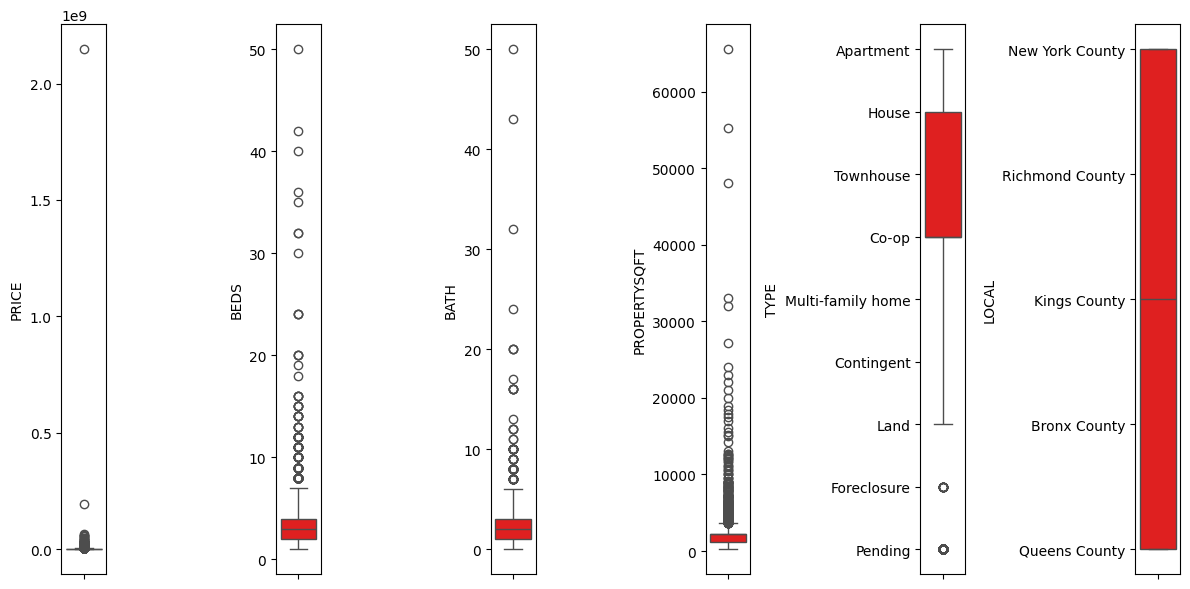

In [53]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = ['PRICE','BEDS','BATH','PROPERTYSQFT','TYPE','LOCAL']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_type[features[i]], color='red')
    plt.tight_layout()

Terdapat oulier di semua kolom

*   Drop outlier di kolom price

###Outlier

####IQR

In [54]:
#Mengcopy data
df_IQR = df_type.copy() #mencari data ourlier dengan metode IQR
df_zscore = df_type.copy() #mencari data ourlier dengan metode Z-Score

In [55]:
#membuat fungsi mencari oulier
def find_outliers_IQR(df):
  Q1 = np.quantile(df,.25) #hitung Q1
  Q3 = np.quantile(df,.75) #hitung Q3
  IQR = Q3 - Q1 #hitung IQR
  upper_limit = Q1+1.5*IQR #hitung limit atas
  lower_limit = Q1-1.5*IQR #hitung limit bawah
  outlier = df[((df<(lower_limit))|(df>(upper_limit)))] #rumus mencari outlier
  not_outlier = df[~((df<(Q1-1.5*IQR))|(df>(Q1+1.5*IQR)))] #rumus mencari tidak outlier
  print('Jumlah outlier\t\t: '+ str(len(outlier)))
  print('Jumlah tidak outlier\t: '+ str(len(not_outlier)))
  print('Upper limit\t\t: '+ str(upper_limit))
  print('Lower limit\t\t: '+ str(lower_limit))
  print('Percentile outlier\t: '+ str(len(outlier)/df.shape[0]*100))
  print('Max outlier\t\t: '+ str(outlier.max()))
  print('Min outlier\t\t: '+ str(outlier.min()))
  return outlier

In [56]:
find_outliers_IQR(df_IQR['PRICE'])

Jumlah outlier		: 858
Jumlah tidak outlier	: 3707
Upper limit		: 1993000.0
Lower limit		: -995000.0
Percentile outlier	: 18.795180722891565
Max outlier		: 2147483647
Min outlier		: 1995000


1       195000000
4        55000000
7        16800000
27        2250000
41        2150000
          ...    
4770      2600000
4778      2300000
4781      2500000
4788      4750000
4795      2999999
Name: PRICE, Length: 858, dtype: int64

Obervation:
1. Terdapat 845 outlier di kolom `PRICE`
2. Terdapat 18,43 % outlier di kolom `PRICE`, kita akan drop, walaupun persyaratan drop < 5%. karena sudah terlalu extreme.
3. Titik tertinggi $ 1.998.250

In [57]:
#menghapus data outlier di kolom PRICE
df_IQR = df_IQR[df_IQR['PRICE'] <= 1998250 ]
df_IQR.shape

(3728, 18)

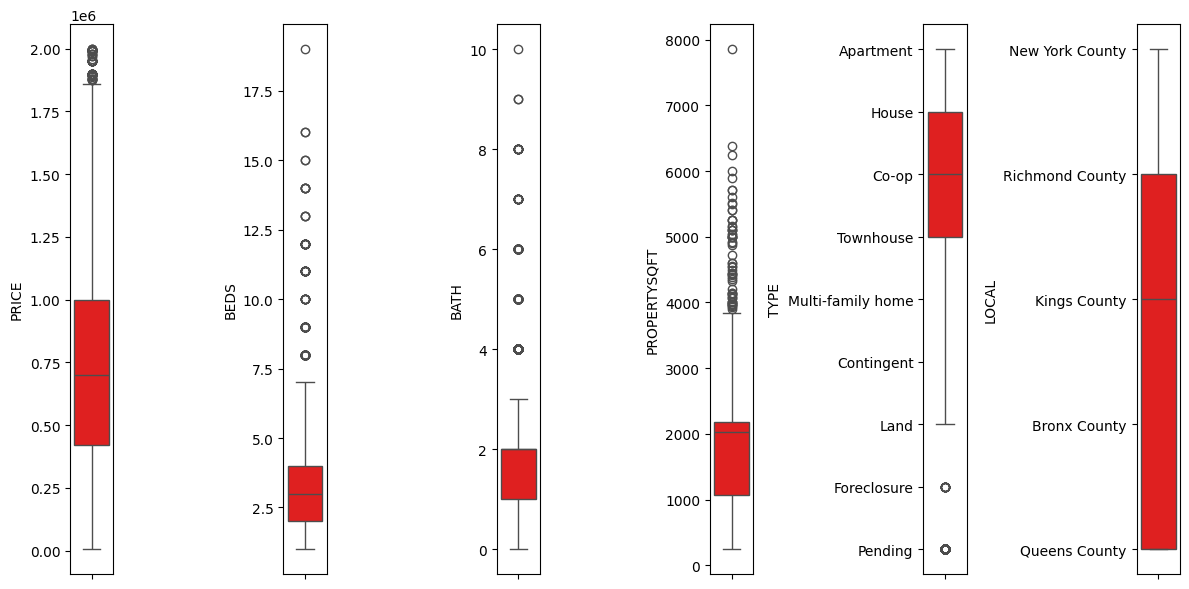

In [58]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_IQR[features[i]], color='red')
    plt.tight_layout()

Obervation:
1. semua kolom terdapat outlier, kecuali kolom `LOCAL`
2. Tidak akan di drop

####Z-Score

In [60]:
#menghitung nilai tertinggi dari rumus zscore
upper_limit_zscore = df_zscore['PRICE'].mean() + 3* df_zscore['PRICE'].std()
#menghitung nilai terendah dari rumus zscore
lower_limit_zscore = df_zscore['PRICE'].mean() - 3* df_zscore['PRICE'].std()
print(f'Upper Limit : {upper_limit_zscore}')
print(f'Lower limit : {lower_limit_zscore}')

Upper Limit : 98819328.54886743
Lower limit : -94052187.34930554


In [61]:
df_zscore['PRICE'] = np.where(df_zscore['PRICE']>upper_limit_zscore,upper_limit_zscore,np.where(df_zscore['PRICE']<lower_limit_zscore,lower_limit_zscore,df_zscore['PRICE']))
df_zscore.describe()['PRICE']

count    4.565000e+03
mean     1.913725e+06
std      4.564672e+06
min      5.800000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      9.881933e+07
Name: PRICE, dtype: float64

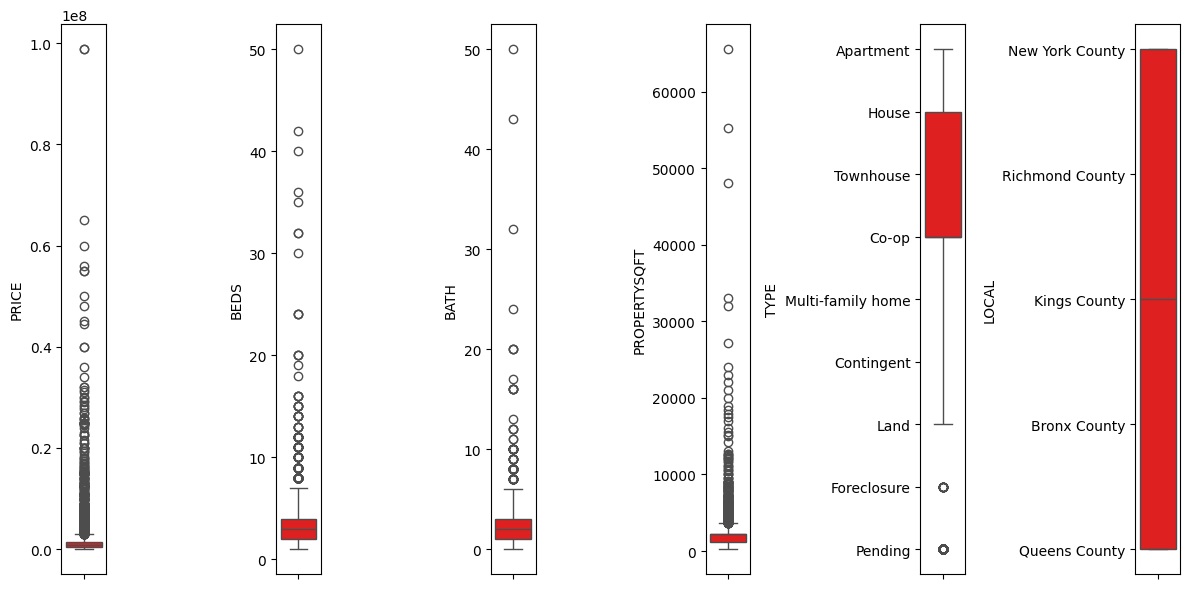

In [63]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_zscore[features[i]], color='red')
    plt.tight_layout()

Observations:
* Metode Z-Score tidak effisien
* lebih bagus metode IQR
* Masih terlalu extreme outlier di kolom `PRICE`

## KDE plot for knowing the distribution form

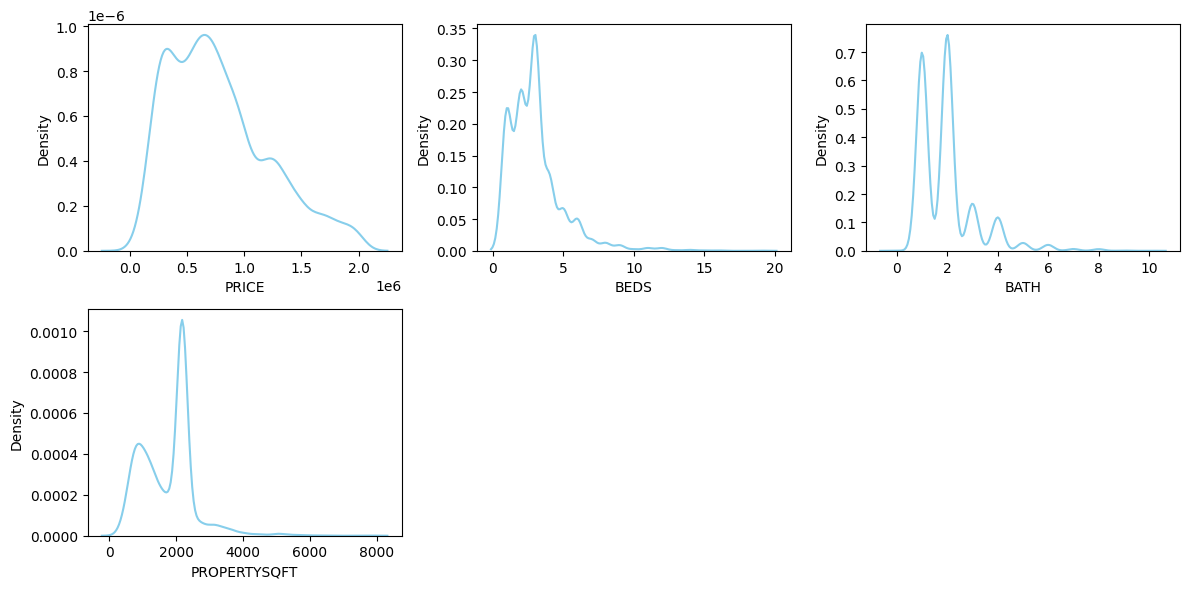

In [66]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = cols
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df_IQR[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

# Bivariate Analysis

In [70]:
#menyalin data
df_encoder = df_IQR.copy()

In [71]:
#Mengubah semua variabel menjadi bertipe numerik
from sklearn.preprocessing import LabelEncoder
df_encoder['TYPE_1'] = LabelEncoder().fit_transform(df_encoder['TYPE'])
df_encoder['LOCAL_1'] = LabelEncoder().fit_transform(df_encoder['LOCAL'])

In [72]:
#Menyalin data yang sudah di akan di preprocessing
data = df_encoder.loc[:,['PRICE','BEDS','BATH','PROPERTYSQFT','TYPE_1','LOCAL_1']].copy()
data.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,TYPE_1,LOCAL_1
0,315000,2,2,1400.000000,0,2
2,260000,4,2,2015.000000,4,4
3,69000,3,1,445.000000,0,2
5,690000,5,2,4004.000000,4,1
6,899500,2,2,2184.207862,0,2


<Axes: >

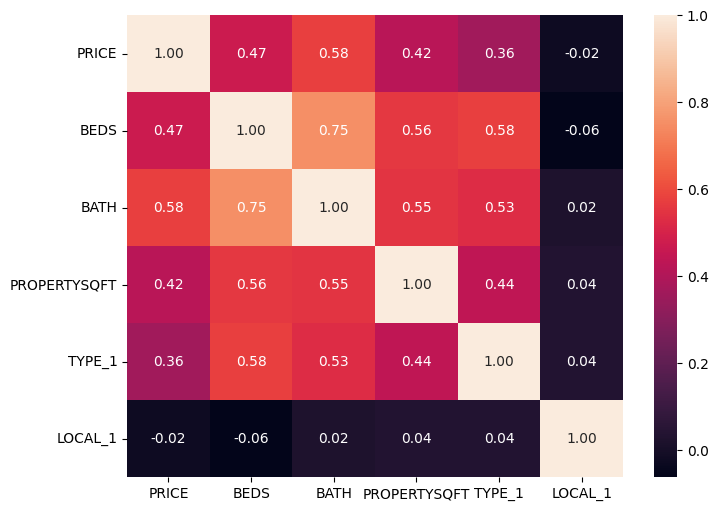

In [73]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observasi:

* `BATH` and `BEDS` are highly correlated each other
